In [2]:
import Bio
from Bio import SeqIO
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# read a fasta file named pan_genome_reference_aa.fa with aminoacids
# sequences of the reference genome
records = list(SeqIO.parse("pan_genome_reference_aa.fa", "fasta"))

In [5]:
# save a vector with the length of each sequence
lengths = [len(record.seq) for record in records]

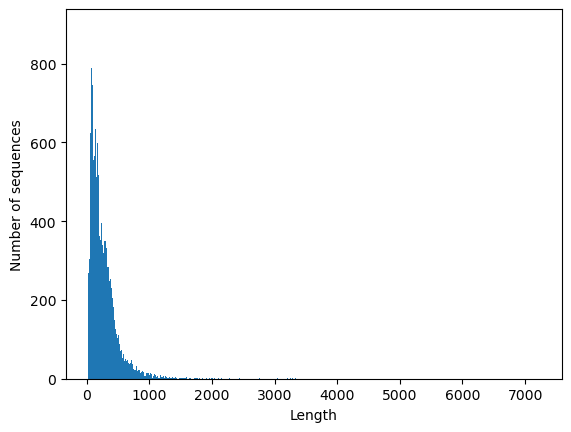

In [10]:
# plot a histogram with the distribution of the lengths
plt.hist(lengths, bins=1000)
plt.xlabel('Length')
plt.ylabel('Number of sequences')
# save the plot as a pdf file
plt.savefig('aa_length_histogram.pdf')


In [12]:
# how many sequences have a length larger than 1300?
sum([l > 1300 for l in lengths])

169

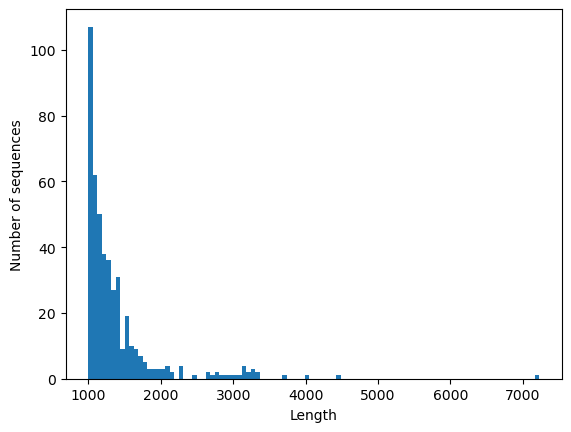

In [15]:
# plot a histogram of proteins larger than 1000 aminoacids
plt.hist([l for l in lengths if l > 1000], bins=100)
plt.xlabel('Length')
plt.ylabel('Number of sequences')
# save the plot as a pdf file
plt.savefig('aa_length_histogram_large.pdf')

In [27]:
# from the fasta file, get a list of headers with the names of the proteins that are larger than 1300 aminoacids
large_proteins = [record.id for record in records if len(record.seq) > 1300]

# save the list of headers in a text file
with open('large_proteins.txt', 'w') as f:
    for item in large_proteins:
        f.write("%s \n" % item)

len(large_proteins)

169

In [29]:
len(records_filtered)

27129

In [21]:
# get a list of proteins that have stop codons within the sequence
stop_codons = [record.id for record in records if '*' in record.seq]
len(stop_codons)

109

In [22]:
# remove the proteins with stop codons and the proteins larger than 1300 aminoacids
records_filtered = [record for record in records if record.id not in large_proteins and record.id not in stop_codons]

In [24]:
len(records)

27406

In [26]:
# write files with 2000 sequences each in the folder seqs4esm
for i in range(0, len(records_filtered), 2000):
    with open('seqs4esm/seqs4esm_' + str(i) + '.fa', 'w') as f:
        SeqIO.write(records_filtered[i:i+2000], f, 'fasta')

# write a file with the remaining sequences
with open('seqs4esm/seqs4esm_' + str(i+2000) + '.fa', 'w') as f:
    SeqIO.write(records_filtered[i+2000:], f, 'fasta')  
    
